<a href="https://colab.research.google.com/github/linainsaf/IA-M1/blob/main/TP1_Bekdouche_Lina_Insaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I- Chargement des données:

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric

In [93]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
 plt.figure(figsize=(7.2, 7.2))
 plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
 for i in range(12):
  plt.subplot(3, 4, i + 1)
  plt.imshow(images[i], cmap=plt.cm.gray)
  plt.xticks(())
  plt.yticks(())
plt.show()

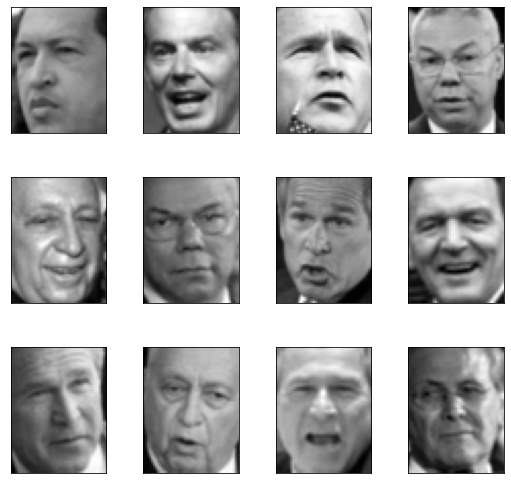

In [94]:
#Charger et afficher les données :
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
plot_gallery(X)

In [143]:
print("la taille des images est : ", len(X[0]),'x',len(X[0][0]),"pixels")
print("le nombre  d'images est : ", len(y))
print("le nombre de classes est : ", len(name))

la taille des images est :  62 x 47 pixels
le nombre  d'images est :  1288
le nombre de classes est :  7


In [41]:
for i,n in enumerate(name):
  print(i+1,": ",n)

1 :  Ariel Sharon
2 :  Colin Powell
3 :  Donald Rumsfeld
4 :  George W Bush
5 :  Gerhard Schroeder
6 :  Hugo Chavez
7 :  Tony Blair


In [50]:
if len(X)%len(name)==0:
  print("Les classes sont équiprobables")
else:
  print("Les classes ne sont pas équiprobables")

Les classes sont équiprobables


(array([ 77., 236.,   0., 121.,   0., 530., 109.,   0.,  71., 144.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

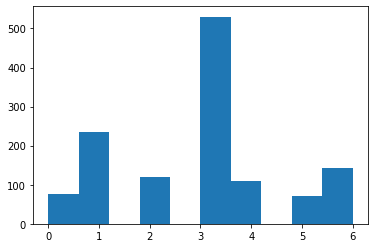

In [60]:
plt.hist(y)

In [63]:
 [X_train,X_test,y_train,y_test]=train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
print("nombre d'images en train : ", len(X_train))
print("nombre d'images en test : ", len(X_test))

print("Dimensions de X_train : ", np.shape(X_train))
print("Dimensions de X_test : ", np.shape(X_test))
print("Dimensions de y_train : ", len(y_train))
print("Dimensions de y_test : ", len(y_test))


nombre d'images en train :  966
nombre d'images en test :  322
Dimensions de X_train :  (966, 62, 47)
Dimensions de X_test :  (322, 62, 47)
Dimensions de y_train :  966
Dimensions de y_test :  322


### III. Prétraitement des données:

In [104]:
# a. Redimensionnement des données:
X_train=np.reshape(X_train,(966,2914))
X_test=np.reshape(X_test,(322,2914))
X_train.shape,X_test.shape

((966, 2914), (322, 2914))

In [111]:
# b. Mise en forme des données pour la classification:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)


Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

Où u est la moyenne des échantillons d'apprentissage ou 0 si with_mean=False, et s est l'écart type des échantillons d'apprentissage ou 1 si with_std=False.

Le centrage et la mise à l'échelle se produisent indépendamment sur chaque fonctionnalité en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La moyenne et l'écart type sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la transformation.

#III. Classification par les KPPV:

In [124]:
#a. Classifieur 1PPV:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_test, y_test)
y_pred=neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=range(7)),"\n")
print("taux de reconnaissance : ",accuracy_score(y_test, y_pred))




[[ 13   0   0   0   0   0   0]
 [  0  60   0   0   0   0   0]
 [  0   0  27   0   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0   0  25   0   0]
 [  0   0   0   0   0  15   0]
 [  0   0   0   0   0   0  36]] 

taux de reconnaissance :  1.0


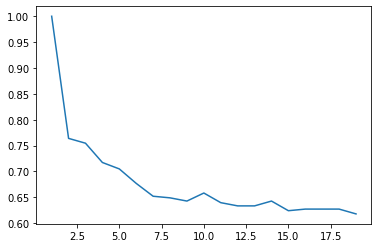

In [139]:
#b. Classifieur KPPV:
score=[]
kplot=[]
for k in range(1,20,1):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_test, y_test)
  y_pred=neigh.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  kplot.append(k)
  #print(confusion_matrix(y_test, y_pred, labels=range(7)),"\n")
  #print("taux de reconnaissance : ",accuracy_score(y_test, y_pred))

# Variation du taux de reconnaissance en fonction de k :
plt.plot(kplot,score)

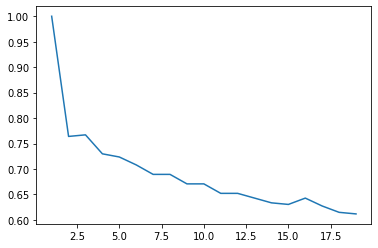

In [140]:
#c. Classifieur KPPV et distance de Manhattan:
score=[]
kplot=[]
for k in range(1,20,1):
  neigh = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  neigh.fit(X_test, y_test)
  y_pred=neigh.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))
  kplot.append(k)
  #print(confusion_matrix(y_test, y_pred, labels=range(7)),"\n")
  #print("taux de reconnaissance : ",accuracy_score(y_test, y_pred))

# Variation du taux de reconnaissance en fonction de k :
plt.plot(kplot,score)

